In [2]:
import scipy
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
def convertFile(fileInName):   
    fileContents = scipy.io.loadmat(fileInName)
    covisDict = {}
    covisDict['header'] = fileContents['__header__'].decode('utf-8')
    covisDict['version'] = fileContents['__version__']
    covisDict['globals'] = fileContents['__globals__']
    covis = fileContents['covis'][0][0]
    for name in covis.dtype.names:
        covisDict[name] = covis[name]
    
    print(f'{fileInName} has been converted')
    return covisDict

In [4]:
def convertImagingFile(fileInName):
    fileContents = scipy.io.loadmat(fileInName)
    covisDict = {}
    covisDict['header'] = fileContents['__header__'].decode('utf-8')
    covisDict['version'] = fileContents['__version__']
    covisDict['globals'] = fileContents['__globals__']
    covis = fileContents['imaging'][0][0]
    for name in covis.dtype.names:
        covisDict[name] = covis[name]
    
    print(f'{fileInName} has been converted')
    return covisDict

In [5]:
def readCoords2D(fileInName):
    covisDict = convertFile(fileInName)
    wList = [w for w in covisDict['grid'][0][0][0]['w']]
    xList = [x for x in covisDict['grid'][0][0][0]['x']]
    yList = [y for y in covisDict['grid'][0][0][0]['y']]
    vList = [v for v in covisDict['grid'][0][0][0]['v']]
    coordsDict = {'xList': xList, 'yList': yList, 'vList': vList, 'wList': wList}
    return coordsDict

In [6]:
def readCoords3D(fileInName, dataVal):
    covisDict = convertImagingFile(fileInName)
    xList = [x for x in covisDict['grid'][0][0]['x']]
    yList = [y for y in covisDict['grid'][0][0]['y']]
    zList = [z for z in covisDict['grid'][0][0]['z']]
    vList = [v for v in covisDict['grid'][0][0][f'{dataVal}']]
    wList = [w for w in covisDict['grid'][0][0]['w']]
    coordsDict = {'xList': xList, 'yList': yList, 'zList': zList, 'vList': vList, 'wList': wList}
    return coordsDict

In [7]:
def createCoordsOfInterest(fileInName, opt1 = '2', opt2 = 'Ia'):
    if opt1 == '2':
        coordsDict = readCoords2D(fileInName)
        coordsOfInterest = {'xList': [], 'yList': [], 'vList': [], 'wList': []}
    elif opt1 == '3':
        coordsDict = readCoords3D(fileInName, opt2)
        coordsOfInterest = {'xList': [], 'yList': [], 'zList': [], 'vList': [], 'wList': []}
    ind = 0
    for key in coordsDict.keys():
        for array in coordsDict['vList']:
            coordsOfInterest[key].append(coordsDict[key][ind])
            ind += 1
        ind = 0
    return coordsDict

In [8]:
def plotDiffuse2DV1(fileInName):
    coordsOfInterest = createCoordsOfInterest(fileInName)
    plt.figure(figsize=(10, 6))
    max = np.amax(np.concatenate(coordsOfInterest['vList']))
    min = np.amin(np.concatenate(coordsOfInterest['vList'])) + 10e-10
    norm = mcolors.LogNorm(vmin = min, vmax = max)
    scatter = plt.scatter(coordsOfInterest['xList'], coordsOfInterest['yList'], c = coordsOfInterest['vList'], cmap = 'viridis', norm = norm)

    cbar = plt.colorbar(scatter)
    cbar.set_label('Data Values')

    plt.xlabel('East of COVIS (m)')
    plt.ylabel('North of COVIS (m)')
    plt.title(fileInName.split('\\')[-1])
    plt.show()


In [9]:
def plotDiffuse2DV2(fileInName):
    coordsOfInterest = createCoordsOfInterest(fileInName)
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(coordsOfInterest['xList'], coordsOfInterest['yList'], c=coordsOfInterest['vList'], cmap = 'viridis', vmin=0, vmax=0.00005)

    cbar = plt.colorbar(scatter)
    cbar.set_label('Data Values')

    plt.xlabel('East of COVIS (m)')
    plt.ylabel('North of COVIS (m)')
    plt.title(fileInName.split('\\')[-1])
    plt.show()

matFiles\COVIS-20230701T003002-diffuse1.mat has been converted


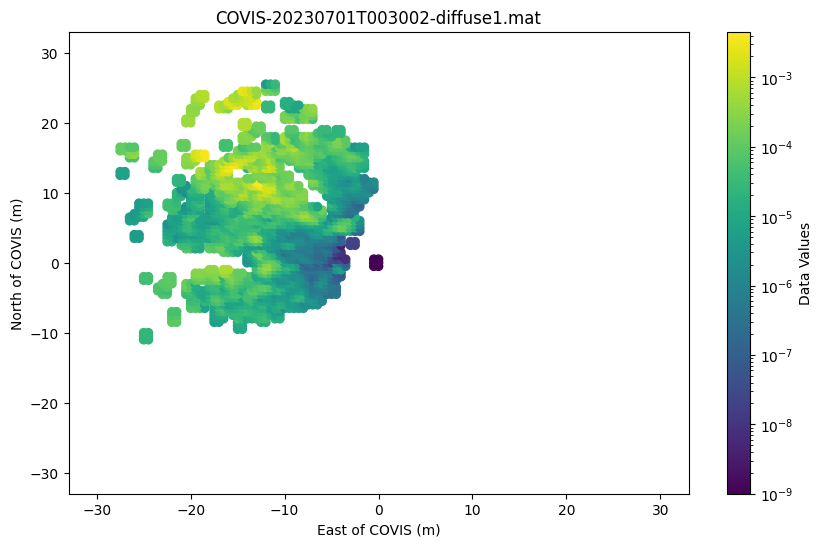

matFiles\COVIS-20230701T003002-diffuse1.mat has been converted


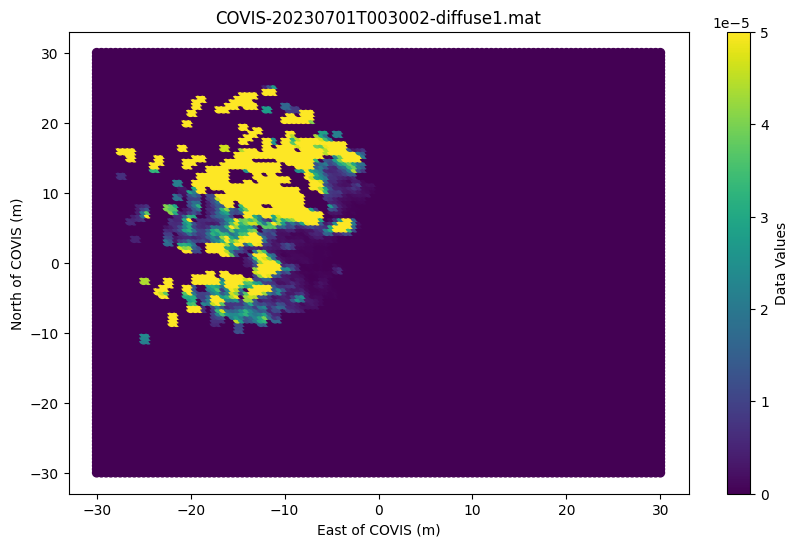

In [10]:
plotDiffuse2DV1(r'matFiles\COVIS-20230701T003002-diffuse1.mat')
plotDiffuse2DV2(r'matFiles\COVIS-20230701T003002-diffuse1.mat')

In [11]:
def plotFullImaging3DV1(fileInName, opt2):
    coordsOfInterest = createCoordsOfInterest(fileInName, '3', opt2)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    max = np.amax(np.concatenate(coordsOfInterest['vList']))
    min = np.amin(np.concatenate(coordsOfInterest['vList'])) + 10e-10
    norm = mcolors.LogNorm(vmin = min, vmax = max)

    scatter = ax.scatter(coordsOfInterest['xList'], coordsOfInterest['yList'], coordsOfInterest['zList'], c = coordsOfInterest['vList'], cmap = 'viridis', norm = norm)
    
    cbar = plt.colorbar(scatter)
    cbar.set_label(f'{opt2} Values')

    ax.set_xlabel('East of COVIS (m)')
    ax.set_ylabel('North of COVIS (m)')
    ax.set_zlabel('Z Axis')
    ax.set_title(f'3D Scatter Plot (Logarithmic scale, {opt2})')

    plt.show()

matFiles\COVIS-20230101T000002-imaging1.mat has been converted


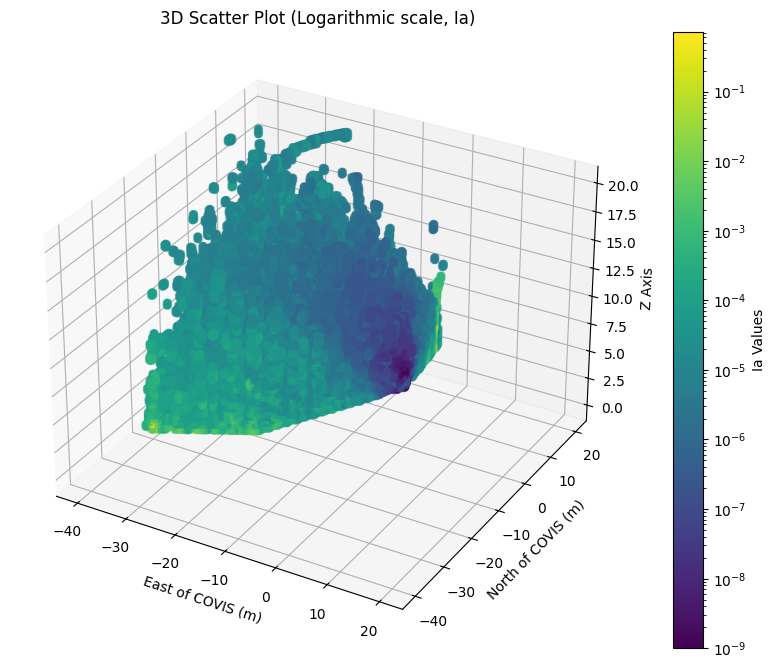

matFiles\COVIS-20230101T000002-imaging1.mat has been converted


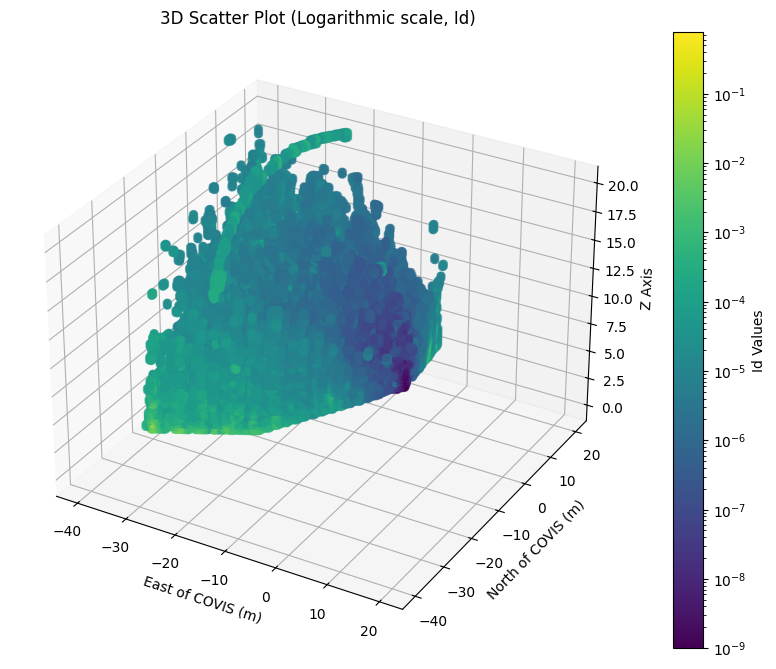

matFiles\COVIS-20230101T000002-imaging1.mat has been converted


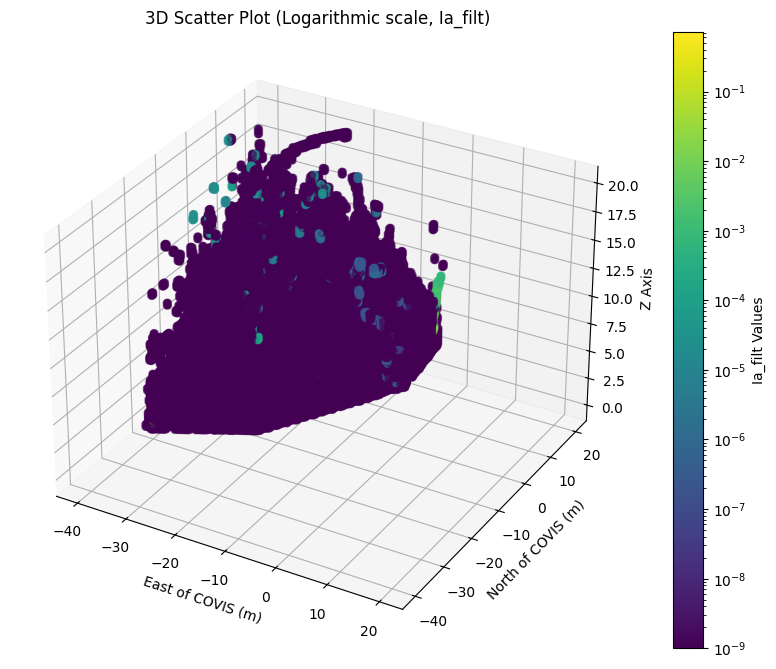

matFiles\COVIS-20230101T000002-imaging1.mat has been converted


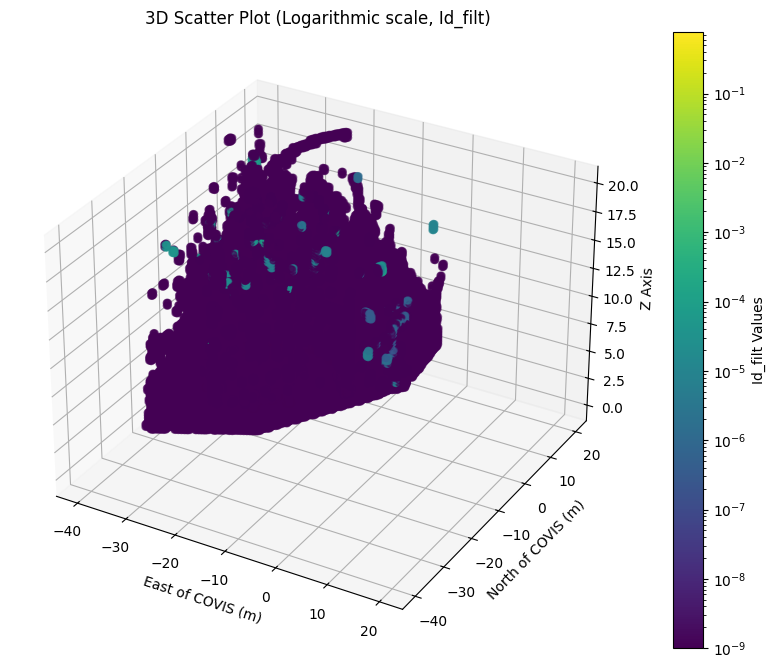

matFiles\COVIS-20230101T000002-imaging1.mat has been converted


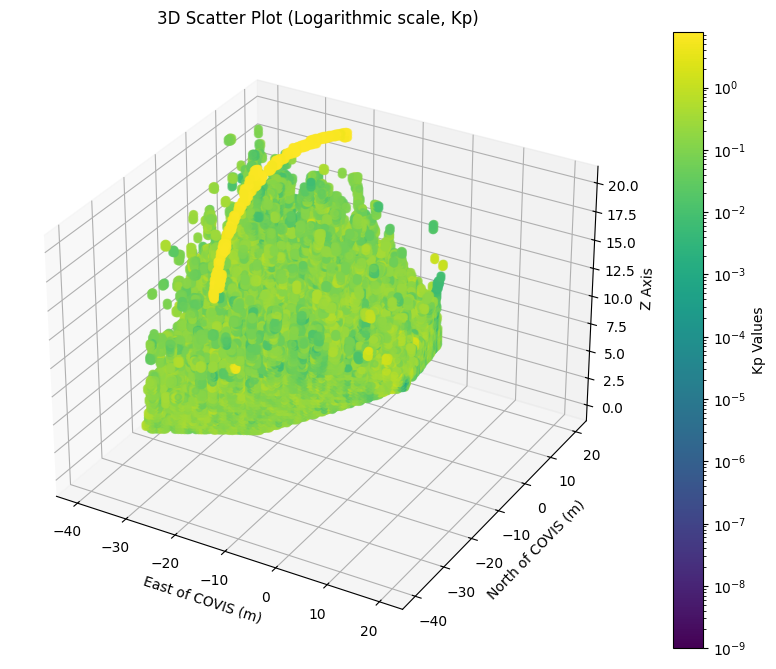

In [86]:
plotFullImaging3DV1(r'matFiles\COVIS-20230101T000002-imaging1.mat', 'Ia')
plotFullImaging3DV1(r'matFiles\COVIS-20230101T000002-imaging1.mat', 'Id')
plotFullImaging3DV1(r'matFiles\COVIS-20230101T000002-imaging1.mat', 'Ia_filt')
plotFullImaging3DV1(r'matFiles\COVIS-20230101T000002-imaging1.mat', 'Id_filt')
plotFullImaging3DV1(r'matFiles\COVIS-20230101T000002-imaging1.mat', 'Kp')